# Experiment 3
## 8 January

## Multiple Linear Regression

### Q1-Download the dataset ’Book1.csv’ from moodle. This dataset has information regarding the house price and many features depending on it. Open the CSV file and see the different features and the target variable Y (house price) also.

In [86]:
## Importing the necessary libraries
import numpy as np 
import pandas as pd
from sklearn.metrics import mean_squared_error 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
##  Load the dataset to a dataframe.
df = pd.read_csv(r'D:\study material\VIT_Data_Science\Winter_Sem\Data Mining and Machine Learning Lab\Class_notes\ML_exp2\Book1.csv')
df

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,13300000,7420,4,2,3,2,furnished
1,12250000,8960,4,4,4,3,furnished
2,12250000,9960,3,2,2,2,semi-furnished
3,12215000,7500,4,2,2,3,furnished
4,11410000,7420,4,1,2,2,furnished
...,...,...,...,...,...,...,...
244,4550000,5320,3,1,2,0,semi-furnished
245,4550000,5360,3,1,2,2,unfurnished
246,4550000,3520,3,1,1,0,semi-furnished
247,4550000,8400,4,1,4,3,unfurnished


##  Drop the furnishing status column and then we will be left out with 5 features (X1, X2, X3, X4, X5) to predict the house price (Y)

In [87]:
df.drop('furnishingstatus',axis = 1,inplace = True)
df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
244,4550000,5320,3,1,2,0
245,4550000,5360,3,1,2,2
246,4550000,3520,3,1,1,0
247,4550000,8400,4,1,4,3


## Use MinMaxScaler() to scale the data to 0 to 1 range.

In [88]:
MM = preprocessing.MinMaxScaler()
x = MM.fit_transform(df)
print(x)

[[1.00000000e+00 3.56776557e-01 5.00000000e-01 3.33333333e-01
  6.66666667e-01 6.66666667e-01]
 [8.80095923e-01 4.69597070e-01 5.00000000e-01 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [8.80095923e-01 5.42857143e-01 2.50000000e-01 3.33333333e-01
  3.33333333e-01 6.66666667e-01]
 ...
 [7.99360512e-04 7.10622711e-02 2.50000000e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.99360512e-04 4.28571429e-01 5.00000000e-01 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.13553114e-01 0.00000000e+00 3.33333333e-01
  0.00000000e+00 0.00000000e+00]]


## Split the data into training and testing sets using appropriate functions. Use a 80:20 split.


In [89]:
X = x[:,1:]
Y = x[:,0]

In [90]:
X.shape

(249, 5)

In [91]:
Y.shape

(249,)

In [92]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

## Also, use the inbuilt LinearRegression class and create an object of this class and fit the model using training data and check for the values of the parameters of your model. If you print the intercept and coefficients as you did in the previous lab you will get the model parameters θ0, θ1, ..., θ5

In [93]:
model = LinearRegression()
model.fit(x_train,y_train)
print("optimized m:",model.coef_)
print("optimized n:",model.intercept_)

optimized m: [0.32033532 0.09007501 0.3199135  0.13202285 0.14958391]
optimized n: -0.06121183786718576


In [94]:
Y_pred = model.predict(x_test)

# Evaluating the model performance using Mean Squared Error
mse = mean_squared_error(y_test, Y_pred)
print(f"Mean Squared Error on test data: {mse}")

Mean Squared Error on test data: 0.020077937566470735


# Q2

## Gradient descent algorithm for multiple regression

In [95]:
def gd(X, Y, m, n, L):
    Dm = np.zeros(X.shape[1])
    Dn = 0  
    m_len = len(X)
    
    for i in range(m_len):
        prediction_error = np.dot(X[i], m) + n - Y[i]
        Dm += (2 / m_len) * prediction_error * X[i]
        Dn += (2 / m_len) * prediction_error
    m = m - L * Dm
    n = n - L * Dn    
    return m, n
m = np.zeros(x_train.shape[1])
n = 0  
L = 0.3
epochs = 1000

for epoch in range(epochs):
    m, n = gd(x_train, y_train, m, n, L)

print(f"Optimized m: {m}")
print(f"Optimized n (intercept): {n}")

# Making predictions using the learned parameters on the test data
Y_pred = np.dot(x_test, m) + n

# Evaluating the model performance using Mean Squared Error
mse = mean_squared_error(y_test, Y_pred)
print(f"Mean Squared Error on test data: {mse}")


Optimized m: [0.32033458 0.09007431 0.31991389 0.13202283 0.14958395]
Optimized n (intercept): -0.061211484565910086
Mean Squared Error on test data: 0.020077925354191114


### Vectorized approach

In [96]:
def gd(X, Y, m, n, L):
    m_len = len(X)
    prediction_error = np.dot(X, m) + n - Y
    Dm = (2 / m_len) * np.dot(X.T, prediction_error)  
    Dn = (2 / m_len) * np.sum(prediction_error)
    m = m - L * Dm
    n = n - L * Dn    
    return m, n

m = np.zeros(x_train.shape[1])
n = 0  
L = 0.3
epochs = 1000

for epoch in range(epochs):
    m, n = gd(x_train, y_train, m, n, L)

print(f"Optimized m: {m}")
print(f"Optimized n (intercept): {n}")

# Making predictions using the learned parameters on the test data
Y_pred = np.dot(x_test, m) + n

# Evaluating the model performance using Mean Squared Error
mse = mean_squared_error(y_test, Y_pred)
print(f"Mean Squared Error on test data: {mse}")


Optimized m: [0.32033458 0.09007431 0.31991389 0.13202283 0.14958395]
Optimized n (intercept): -0.06121148456591006
Mean Squared Error on test data: 0.020077925354191114


## Alternate approach

In [97]:
z = np.ones(len(x_train))
new_X_train = np.concatenate((np.array(z)[:, np.newaxis], x_train), axis=1)
print(new_X_train)


[[1.         0.05054945 0.5        0.         0.66666667 0.33333333]
 [1.         0.15018315 0.25       0.33333333 0.33333333 0.66666667]
 [1.         0.27472527 0.25       0.         0.         0.66666667]
 ...
 [1.         0.08424908 0.5        0.         0.33333333 0.        ]
 [1.         0.2967033  0.25       0.         1.         1.        ]
 [1.         0.42857143 0.25       0.         0.33333333 0.66666667]]


In [98]:
def gd(data,yt,parameters,lrate):
    slopes = np.zeros(6)
    for j in range(len(data)):
        for k in range(6):
            slopes[k]+= (1/len(data))*((data[j]*parameters).sum()-yt[j])*data[j][k]
    parameters = parameters-lrate*slopes
    return parameters
parameters = np.zeros(6)
lrate = 0.9
iter_value = 1500
for i in range(iter_value):
    parameters = gd(new_X_train,y_train,parameters,lrate)
print(parameters)

[-0.06121184  0.32033532  0.09007501  0.3199135   0.13202285  0.14958391]


# Q3
### Implement the Linear regression problem what we attempted using the housepricedata set in the last lab using stochastic gradient descent and mini batch gradient descent and present the results and plots of your model. Also find the testing error in both the cases. ( Use the learning rate to be 0.5 and Hint: you can use random module and random.sample function can be used to generate say 30 (a mini batch) of indices and the derivative can be calculated for only those data points and summed. which can be used to update the model parameters values.



In [99]:
## loading the dataset
data = pd.read_csv(r'D:\study material\VIT_Data_Science\Winter_Sem\Data Mining and Machine Learning Lab\Class_notes\ML_exp2\Training_set_heights200.csv')
data

,Height,Weight
0,127.8296,67.63371
1,123.4114,65.95421
2,134.4043,66.14316
3,155.9981,73.45251
4,136.1354,69.30943
...,...,...
194,135.2500,68.41222
195,109.5143,66.49607
196,139.6043,67.84894
197,134.3672,67.27839


In [100]:
#  Use MinMaxScaler() to scale the data to 0 to 1 range.
MM = preprocessing.MinMaxScaler()
x = MM.fit_transform(data)

In [101]:
X = x[:,0]
Y = x[:,1]

In [102]:
# splitting the data into train and test

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state= 0)

In [103]:
# Creating linear regression model and fitting the data
reg = LinearRegression()
reg.fit(x_train.reshape(-1,1),y_train)
m = reg.intercept_
n = reg.coef_
print(m,n)
# Making predictions using the learned parameters on the test data
Y_pred = reg.predict(x_test.reshape(-1,1))

# Evaluating the model performance using Mean Squared Error
mse = mean_squared_error(y_test, Y_pred)
print(f"Mean Squared Error on test data: {mse}")

0.3187097588547204 [0.42917335]
Mean Squared Error on test data: 0.02829974777181332


In [104]:
def gd(xt,yt,mb,nb,L):
    Dm=0
    Dn=0
    for i in range(len(xt)):
        Dm=Dm+(2/len(xt))*((mb*xt[i]+nb-yt[i])*xt[i])
        Dn=Dn+(2/len(xt))*(mb*xt[i]+nb-yt[i])
    mb=mb-L*Dm
    nb=nb-L*Dn
    return mb,nb
m=0
n=0
L=0.5
epochs=900
for i in range(epochs):
    m,n=gd(x_train,y_train,m,n,L)
print(m,n)

0.42917326798919886 0.3187098016324925


## Stochastic gradient descent

In [105]:
def sgd(x,y,m,n,L):
    ## randomly shuffling the data
    i = np.random.randint(len(x))
    dm = 2*(m*x[i]+n - y[i])*x[i]
    dn = 2*(m*x[i]+n - y[i])
    m -= L*dm
    n -= L*dn
    return m,n

m_sgd = 0
n_sgd = 0  
L = 0.3
epochs = 1500

for epoch in range(epochs):
    m_sgd, n_sgd = sgd(x_train, y_train, m, n, L)

print(f"Optimized m: {m_sgd}")
print(f"Optimized n (intercept): {n_sgd}")

# Making predictions using the learned parameters on the test data
Y_pred = np.dot(x_test,m_sgd) + n_sgd

# Evaluating the model performance using Mean Squared Error
mse = mean_squared_error(y_test, Y_pred)
print(f"Mean Squared Error on test data: {mse}")

Optimized m: 0.443281943852369
Optimized n (intercept): 0.34806297724312585
Mean Squared Error on test data: 0.027451015932419075


## Minibatch gradient descent

In [106]:
def mbgd(x,y,m,n,l,batchsize):
    indices = np.random.permutation(len(x))
    x,y = x[indices],y[indices]
    for i in range(0,len(x),batchsize):
        x_batch = x[i:i+batchsize]
        y_batch = y[i:i+batchsize]
        grad_m = np.sum(2*(m*x_batch+n-y_batch)*x_batch/len(x_batch))
        grad_n = np.sum(2*(m*x_batch+n-y_batch)/len(x_batch))
        m-= l*grad_m
        n-=l*grad_n
    return m,n

m_mbgd = 0
n_mbgd = 0  
L = 0.5
batchsize = 30
epochs = 1500

for epoch in range(epochs):
    m_mbgd, n_mbgd = mbgd(x_train, y_train, m, n, L,batchsize)

print(f"Optimized m: {m_mbgd}")
print(f"Optimized n (intercept): {n_mbgd}")

# Making predictions using the learned parameters on the test data
Y_pred = np.dot(x_test,m_mbgd) + n_mbgd

# Evaluating the model performance using Mean Squared Error
mse = mean_squared_error(y_test, Y_pred)
print(f"Mean Squared Error on test data: {mse}")


Optimized m: 0.41640933750720044
Optimized n (intercept): 0.3005646943825705
Mean Squared Error on test data: 0.03055277822325292


## Plotting the regression lines for both models

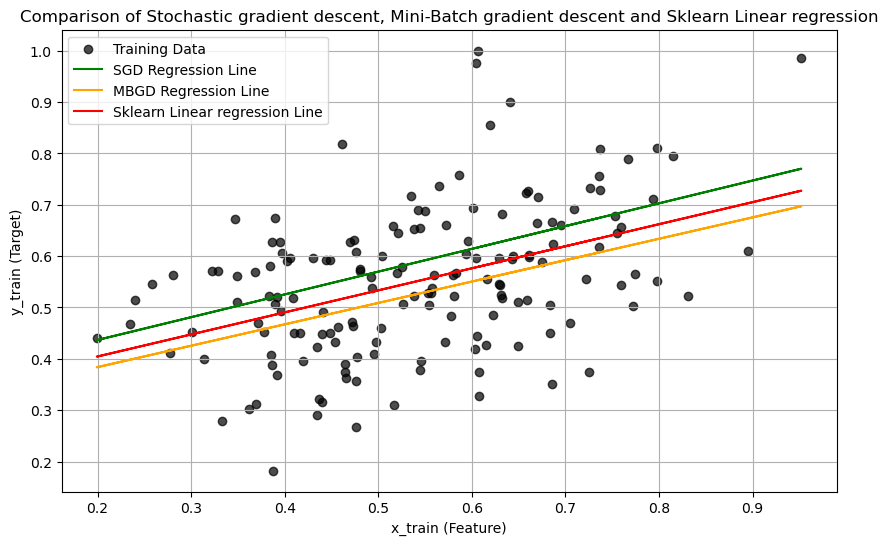

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='black', label='Training Data',alpha=0.7)
plt.plot(x_train, m_sgd * x_train + n_sgd, color='green', label='SGD Regression Line')
plt.plot(x_train, m_mbgd * x_train + n_mbgd, color='orange', label='MBGD Regression Line')
plt.plot(x_train, m * x_train + n, color='red', label='Sklearn Linear regression Line')
plt.title("Comparison of Stochastic gradient descent, Mini-Batch gradient descent and Sklearn Linear regression")
plt.xlabel("x_train (Feature)")
plt.ylabel("y_train (Target)")
plt.legend()
plt.grid(True)
plt.show()


# Polynomial Regression

#### Q4. When we look at the scatter plot of the data in trainingheights200.csv. It can be  identified that there is a quadratic nature for the data. So it would be good we can go for such a model.Let us try to now implement polynomial regression in the case of same dataset training heights200.csv. Let us say we want to fit a polynomial of degree 3 to this data we can do  so. That is the model we are trying to fit is hθ(x) = θ0 +θ1x+θ2x2 +θ3x3  So here we need to model the variable Y in terms of the features X,X2,X3. We can take Y has weight and X as height from the data set

In [110]:
# importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [111]:
## reading the dataset
training_dataset = pd.read_csv(r'D:\study material\VIT_Data_Science\Winter_Sem\Data Mining and Machine Learning Lab\Class_notes\ML_exp2\Training_set_heights200.csv')

In [112]:
training_dataset

,Height,Weight
0,127.8296,67.63371
1,123.4114,65.95421
2,134.4043,66.14316
3,155.9981,73.45251
4,136.1354,69.30943
...,...,...
194,135.2500,68.41222
195,109.5143,66.49607
196,139.6043,67.84894
197,134.3672,67.27839


In [113]:
#  Use MinMaxScaler() to scale the data to 0 to 1 range.
MM = preprocessing.MinMaxScaler()
x = MM.fit_transform(training_dataset)

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x[:,0].reshape(-1,1),x[:,1],test_size=0.3,random_state=0)

In [115]:
poly = PolynomialFeatures(degree=3,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly,y_train)

y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

train_mse = mean_squared_error(y_train,y_train_pred)
test_mse = mean_squared_error(y_test,y_test_pred)

print("Training MSE:",train_mse)
print("Testing MSE:",test_mse)

print("polynomial coefficients:",model.coef_)
print("Intercept:",model.intercept_)


Training MSE: 0.015123017896174455
Testing MSE: 0.031124085897679937
polynomial coefficients: [ 0.         -0.27208909  0.55389291  0.08276656]
Intercept: 0.4963572481217523


## Plotting


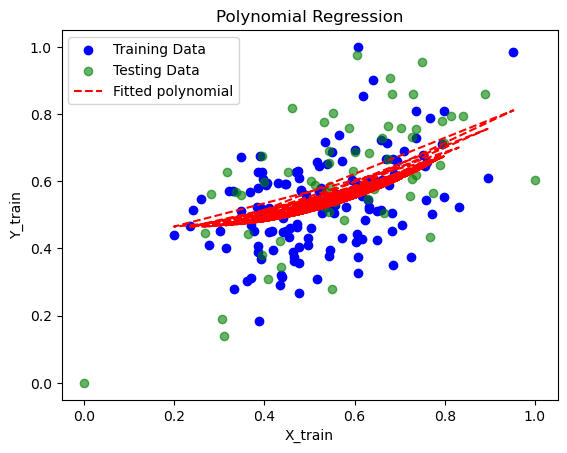

In [116]:
plt.scatter(x_train,y_train,label = "Training Data",color = 'blue')
plt.scatter(x_test,y_test,label = "Testing Data",color = 'green',alpha=0.6)
plt.plot(x_train,y_train_pred,linestyle='--',color = 'red',label = "Fitted polynomial")
plt.xlabel("X_train")
plt.ylabel("Y_train")
plt.legend()
plt.title("Polynomial Regression")
plt.show()